# Semana 5

## FSC5705 - Física Computacional
## 10/04/2024

### Atenção
- **Não esqueça de reiniciar o kernel e rodar todas as células para testar o notebook antes de enviar.**

### Ponto lagrangiano interno

Existe um ponto entre a Terra e a Lua, chamado *Ponto lagrangiano* $L_1$, onde um satélite orbita a Terra em perfeita sincronia com a Lua, permanecendo exatamente entre as duas. Isso acontece porque as atrações gravitacionais da Terra e da Lua se combinam para criar exatamente a aceleração centrípeta necessária para um movimento circular com mesmo período do da Lua. Considere a figura abaixo.

[Mark Newman, Computational Physics](http://www-personal.umich.edu/~mejn/cp/)

![Local do ponto Lagrangeano L1 no sistema Terra-Lua.](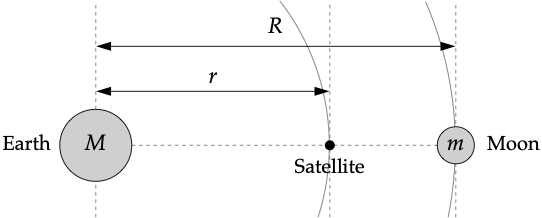
)

Vamos supor órbitas circulares e coplanares, com a Terra muito mais massiva que a Lua e o satélite (Terra parada no centro das órbitas). A distância $r$ do centro da Terra até o ponto $L_1$, neste caso, é dada pela equação

$$
\frac{GM}{r^2} - \frac{Gm}{(R - r)^2} = \omega^2 r,
$$

onde $\omega$ é a velocidade angular do movimento circular.

Podemos calcular facilmente $\omega$ considerando apenas o movimento da Lua. Se a sua aceleração centrípeta é devida à aceleração da gravidade,

\begin{align}
\omega^2 R &= \frac{GM}{R^2} \\
\omega^2 &= \frac{GM}{R^3}.
\end{align}

**a.** Queremos encontrar $r$ que satisfaz a equação acima. Expresse a equação de forma a poder aplicar o método de Newton. Lembre que vai ser necessário calcular a derivada da função, então capriche nas simplificações! Quantidades envolvidas:

- $G = 6.67430 \times 10^{-11}\,\mathrm{m}^3\,\mathrm{kg}^{-1}\,\mathrm{s}^{-1}$
- $R = 3.844 \times 10^8\,\mathrm{m}$
- $M = 5.972168 \times 10^{24}\,\mathrm{kg}$
- $m = 7.342 \times 10^{22}\,\mathrm{kg}$

Faça o gráfico da função, e verifique se a solução existe.

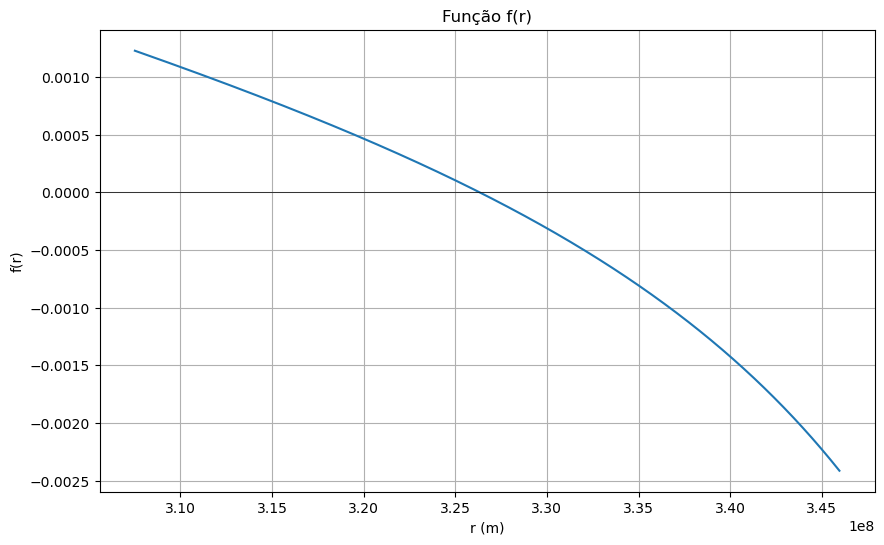

Valor de r (distância do centro da Terra até o ponto L1): 326327694.03490686 m


In [13]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

G = 6.67430e-11  # m^3 kg^-1 s^-2
R = 3.844e8      # m
M = 5.972168e24  # kg
m = 7.342e22     # kg

def f(r):
    return G*M/r**2 - G*m/(R - r)**2 - G*M*r/R**3

r_values = np.linspace(0.8 * R, 0.9 * R, 1000)
f_values = f(r_values)

plt.figure(figsize=(10, 6))
plt.plot(r_values, f_values)
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Função f(r)')
plt.xlabel('r (m)')
plt.ylabel('f(r)')
plt.grid(True)
plt.show()

# Chute inicial baseado no gráfico
r_initial_guess = 0.83 * R  

r_solution_fsolve = fsolve(f, r_initial_guess)

print(f"Valor de r (distância do centro da Terra até o ponto L1): {r_solution_fsolve[0]} m")

**b.** Use o método de Newton para encontrar a solução, com uma precisão de pelo menos 4 algarismos significativos. Compare com o valor calculado usando o centro de massa do sistema, $L_1 = 326.39 \times 10^3\,\mathrm{km}$.

In [19]:
import numpy as np
from scipy.optimize import newton

G = 6.67430e-11  # m^3 kg^-1 s^-2
R = 3.844e8      # m
M = 5.972168e24  # kg
m = 7.342e22     # kg


# Função f(r)
def f(r):
    return G*M/r**2 - G*m/(R - r)**2 - G*M*r/R**3

# Chute inicial para fsolve
r_initial_guess = 0.9 * R

r_solution_fsolve = fsolve(f, r_initial_guess)[0]
r_solution_km = r_solution_fsolve / 1000
L1_known_km = 326.39 * 10**3  #km

difference_km = np.abs(r_solution_km - L1_known_km)
percentage_difference = (difference_km / L1_known_km) * 100

print(f"Valor calculado para L1: {r_solution_km:.4f} km")
print(f"Valor conhecido para L1: {L1_known_km:.4f} km")
print(f"Diferença absoluta: {difference_km:.4f} km")
print(f"Diferença percentual: {percentage_difference:.4f}%")

Valor calculado para L1: 326327.6940 km
Valor conhecido para L1: 326390.0000 km
Diferença absoluta: 62.3060 km
Diferença percentual: 0.0191%
